<a href="https://colab.research.google.com/github/evelynunez18/IA_002_A2024_IB/blob/main/FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8681 - loss: 0.4688 - val_accuracy: 0.9513 - val_loss: 0.1701
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9597 - loss: 0.1418 - val_accuracy: 0.9661 - val_loss: 0.1181
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9720 - loss: 0.0931 - val_accuracy: 0.9714 - val_loss: 0.1012
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9786 - loss: 0.0696 - val_accuracy: 0.9696 - val_loss: 0.1024
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9849 - loss: 0.0501 - val_accuracy: 0.9742 - val_loss: 0.0883
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9886 - loss: 0.0372 - val_accuracy: 0.9722 - val_loss: 0.0975
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9917 - loss: 0.0288 - val_accuracy: 0.9754 - val_loss: 0.0920
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9937 - loss: 0.0222

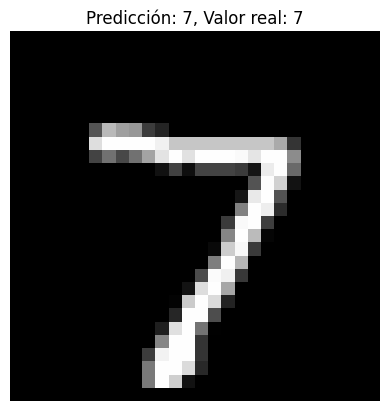

Predicción: 2, Valor real: 2


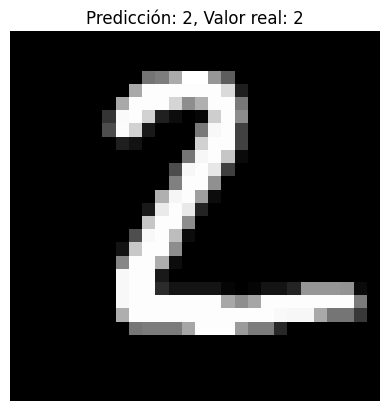

Predicción: 1, Valor real: 1


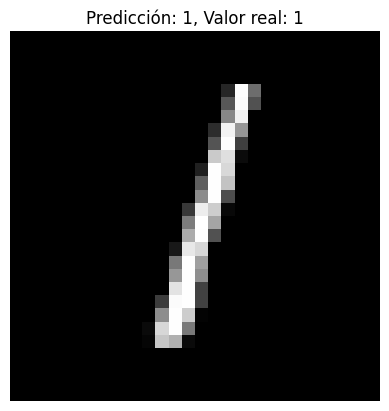

Predicción: 0, Valor real: 0


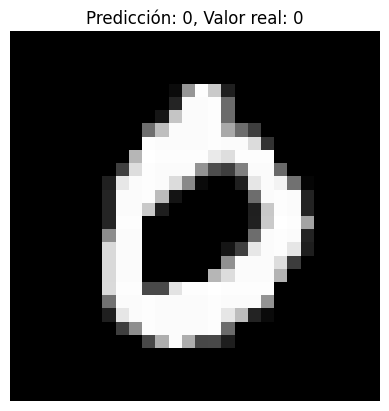

Predicción: 4, Valor real: 4


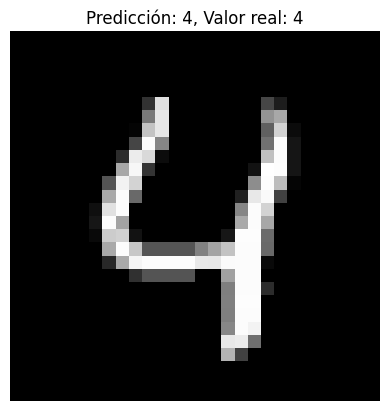

In [1]:
#Artificial Neural Network: feedforward
#Evelyn Sofia Nuñez Cura
#1997373, N4

# Upload Libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

# Upload data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Data processing
# Format of the image
train_data = train_data.reshape((train_data.shape[0], 28 * 28)).astype('float32') / 255
test_data = test_data.reshape((test_data.shape[0], 28 * 28)).astype('float32') / 255


train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Training model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))  # Capa oculta
model.add(Dense(10, activation='softmax'))  # Capa de salida

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Use the "evaluate" function to display the prediction accuracy of the model with the test dataset (test_data).
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Precisión del modelo en el conjunto de prueba: {test_accuracy:.4f}')

# Perform 5 different predictions with the test dataset (test_data).
predictions = model.predict(test_data)

#In the result, display the prediction and the actual value.
for i in range(5):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(test_labels[i])
    print(f'Predicción: {predicted_label}, Valor real: {actual_label}')

    # Muestra de la imagen
    plt.imshow(test_data[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicción: {predicted_label}, Valor real: {actual_label}')
    plt.axis('off')
    plt.show()
